In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
#Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
sum(city_data_df["type"]=="Urban")

66

In [10]:
city_data_df.groupby("type").count()

,city,driver_count
type,,
Rural,18,18
Suburban,36,36
Urban,66,66


In [11]:
#For ride data frame get the columns info and the rows not unll
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
#Get the columns and rows count that have null values
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
#Get the data type of each column in ride data
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [14]:
#Combine the dataframe using the join column. based on the above info it will be city. as we want all data from ride data 
# We will merge ride data left join with city data to ensure we get all daily data from ride data.
# note that if there is a city data with missing ride data then it will be missing in the merged data.
#in addition as ride data is more grauly, city data will duplicated for each ride daily data for the city.

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
#For the bubble chart, we will need to plot the following:
#The average fare for each type of city on the y-axis
#The total number of rides for each type city on the x-axis
#Make the size of each marker, or bubble, correlate to the average number of drivers for each type of city
#Here are the steps to create a bubble chart:
#To get the average fare, we can use the Pandas mean() method for each city in the "fare" column.
#To get the total number of rides for each city, we can use the Pandas count() method for each city in the "ride_id" column.
#To make the bubble size correlate to the number of drivers for each city, we can get the average driver_count for each city.
#Let's create three separate DataFrames, one for each type of city.


In [16]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
# Create the Suburban city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()


,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [18]:
#Create Rural city DataFrames. 
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [19]:
#To get the number of rides for each city by each type of city, we have to create a Series where the index is the name of the city and the column is the number of rides for that city.
#To create a Data Series with one of the columns in a DataFrame, we can use the groupby() function and add the column inside the parentheses.
#Using the groupby() function can be used to group large amounts of data when we want to compute mathematical operations on these groups.

# Get the number of rides for urban cities. 
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [20]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
#rural_ride_count

In [21]:
#Using the separate DataFrames for each city type, we can calculate the average fare for each city in the urban, suburban, and rural cities.
#Using the groupby() function, we can chain the mean() method to get the averages of the fare column.
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [22]:
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [23]:
#The last data point we need for our bubble chart is the average number of drivers for each city in the urban, suburban, and rural cities.
#Note we are using averaget drive count as in the merged data frame the drive count was duplicate as ride data was more granular
# we can use city_data_df directly also to get the driver count, but we will have to cut the data by type again.
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [24]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

In [25]:
#If we look at the final product, we can see that the bubble chart contains three different scatter plots, one for each type of city:
#Our first task will be to create a scatter plot for each type of city where the following conditions are met:
#The x-axis is the number of rides for each city.
#The y-axis is the average fare for each city.
#The size of each marker is the average number of drivers in each city.

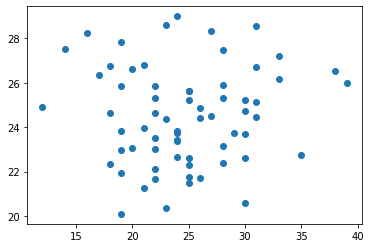

In [26]:
#To create a scatter plot using the MATLAB method, use the plt.scatter() function.
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_avg_fare)

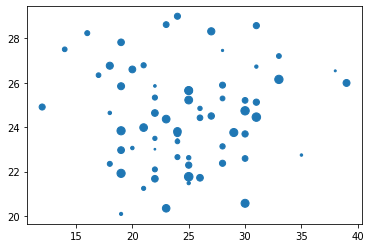

In [27]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=urban_driver_count)

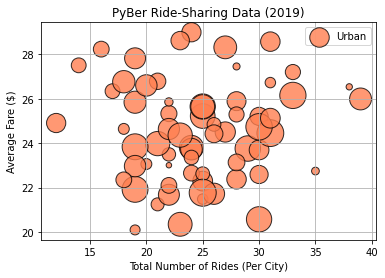

In [28]:
#Some of the bubbles are still too small, so let's increase the size by a factor of 10 and add a black edge color to the circles that have a line width of 1. While we're changing these features, let's pay homage to the company's color scheme and make the urban markers coral and 20% transparent. 
#We can also add a title, labels for the axes, a legend, and a grid.
#To change the marker color, we add the color= parameter to the scatter() function.
#To add a title, x-axis and y-axis labels, and a legend, we use the plt.title(), plt.ylabel(), plt.xlabel(), and plt.legend() functions, respectively.
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

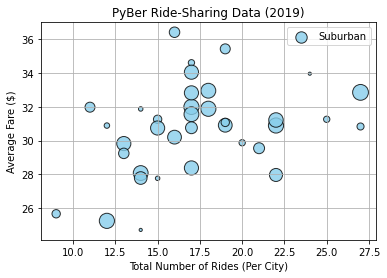

In [29]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

In [30]:
print(rural_ride_count.head())
print(rural_avg_fare.head())
print(rural_driver_count.head())

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64
city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64
city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64


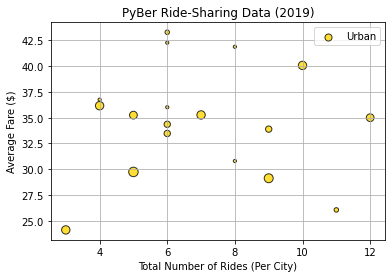

In [31]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

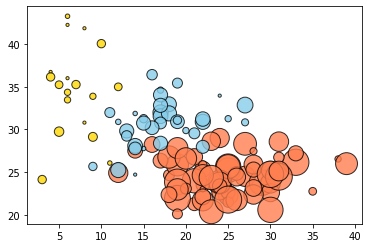

In [32]:
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Show the plot
plt.show()

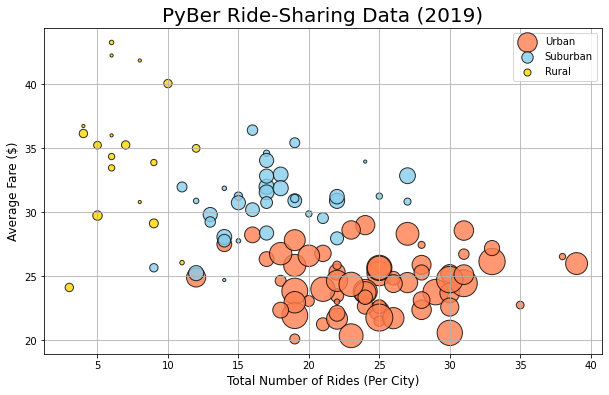

In [33]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
plt.legend()
# Show the plot
plt.show()

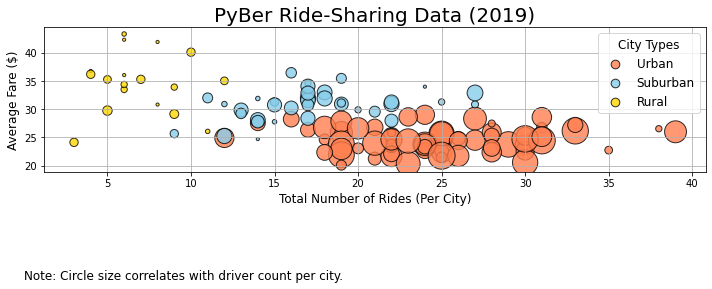

In [34]:
# re-create the plot after fixing legend and add a note about buble size
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(0, 0, "Note: Circle size correlates with driver count per city.", fontsize="12")
# Save the figure.
plt.tight_layout()
plt.savefig("analysis/Fig1.png")

In [35]:
#The Pandas describe() function on the DataFrame or Series.
#The Pandas mean(), median(), and mode() methods on a Series.
#The NumPy mean() and median() functions, and the SciPy stats mode() function on a Series.

In [36]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [37]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [38]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [39]:
# Calculate the mean of the ride count for each city type. use tuple mean or average tupe
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [40]:
# Calculate the mean of the ride count for each city type. use  median tuple
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [41]:
# Calculate the mean of the ride count for each city type. use  mode tuple . some time mode could have more than one value.
round(urban_ride_count.mode(),2) ,round(suburban_ride_count.mode(),2) ,round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [42]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [43]:
#Let's calculate the mean, median, and mode—otherwise known as the measures of central tendency for the ride counts—and print out those measures.
#To get the measures of central tendency of the ride counts for the urban cities, add the following code block.

In [44]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [45]:
# Calculate the measures of central tendency for the ride count for the Suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [46]:
# Calculate the measures of central tendency for the ride count for the Rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [47]:
#In order to get the summary statistics for the average fare for each city type, we'll need to get the data from the "fare" column in each city type DataFrame.
#Add the following code to a new cell to create a Series with all the fares from the "fare" column for the urban_cities_df DataFrame:

In [48]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [49]:
# Calculate the measures of central tendency for the fare for urban cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean for the fare for urban trips is {mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median for the fare for urban trips is {median_urban_fares}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode for the fare for urban trips is {mode_urban_fares}.")

The mean for the fare for urban trips is 24.53.
The median for the fare for urban trips is 24.64.
The mode for the fare for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [50]:
# Get the fares for the Suburban cities.
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()
# Calculate the measures of central tendency for the fare for suburban cities
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean for the fare for suburban trips is {mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median for the fare for suburban trips is {median_suburban_fares}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode for the fare for suburban trips is {mode_suburban_fares}.")

The mean for the fare for suburban trips is 30.97.
The median for the fare for suburban trips is 30.75.
The mode for the fare for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [51]:
# Get the fares for the Rural cities.
rural_fares = rural_cities_df["fare"]
rural_fares.head()
# Calculate the measures of central tendency for the fare for rural cities
mean_rural_fares = np.mean(rural_fares)
print(f"The mean for the fare for rural trips is {mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median for the fare for rural trips is {median_rural_fares}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode for the fare for rural trips is {mode_rural_fares}.")

The mean for the fare for rural trips is 34.62.
The median for the fare for rural trips is 37.05.
The mode for the fare for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [52]:
#In order to perform summary statistics for the number of drivers by city type, we need to create a Series for each city type based on the driver_count column in each city type DataFrame.
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()
# Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()
# Get the driver count data from the rural cities.
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()


2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [53]:
# Calculate the measures of central tendency for the fare for urban cities
mean_urban_driver_count = np.mean(urban_drivers)
print(f"The mean for the urban driver count for urban trip is {mean_urban_driver_count:.2f}.")

median_urban_driver_count = np.median(urban_drivers)
print(f"The median for the urban driver count for urban trip is {median_urban_driver_count}.")

mode_urban_driver_count = sts.mode(urban_drivers)
print(f"The mode for the urban driver count for urban trip is {mode_urban_driver_count}.")


The mean for the urban driver count for urban trip is 36.68.
The median for the urban driver count for urban trip is 37.0.
The mode for the urban driver count for urban trip is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [54]:
# Calculate the measures of central tendency for the fare for suburban cities
mean_suburban_driver_count = np.mean(suburban_drivers)
print(f"The mean for the suburban driver count for suburban trip is {mean_suburban_driver_count:.2f}.")

median_suburban_driver_count = np.median(suburban_drivers)
print(f"The median for the suburban driver count for suburban trip is {median_suburban_driver_count}.")

mode_suburban_driver_count = sts.mode(suburban_drivers)
print(f"The mode for the suburban driver count for suburban trip is {mode_suburban_driver_count}.")

The mean for the suburban driver count for suburban trip is 13.71.
The median for the suburban driver count for suburban trip is 16.0.
The mode for the suburban driver count for suburban trip is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [55]:
# Calculate the measures of central tendency for the fare for rural cities
mean_rural_driver_count = np.mean(rural_drivers)
print(f"The mean for the rural driver count for rural trip is {mean_rural_driver_count:.2f}.")

median_rural_driver_count = np.median(rural_drivers)
print(f"The median for the rural driver count for rural trip is {median_rural_driver_count}.")

mode_rural_driver_count = sts.mode(rural_drivers)
print(f"The mode for the rural driver count for rural trip is {mode_rural_driver_count}.")

The mean for the rural driver count for rural trip is 4.30.
The median for the rural driver count for rural trip is 4.0.
The mode for the rural driver count for rural trip is ModeResult(mode=array([1], dtype=int64), count=array([32])).


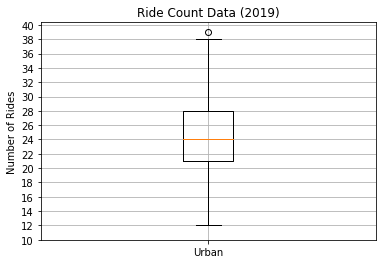

In [56]:
#Creating a box-and-whisker plot requires that we use the ax.boxplot() function, which takes an array inside the parentheses. We can also add a title and axes labels as we have done before.

# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

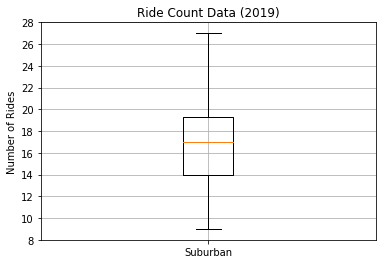

In [57]:
# Create a box-and-whisker plot for the Suburban cities ride count.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(8, 30, step=2.0))
ax.grid()
plt.show()

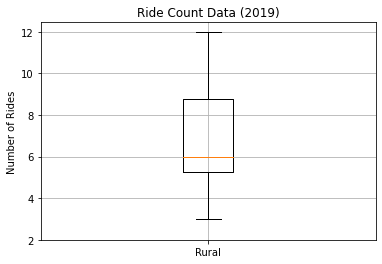

In [58]:
# Create a box-and-whisker plot for the Rural cities ride count.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(2, 14, step=2.0))
ax.grid()
plt.show()

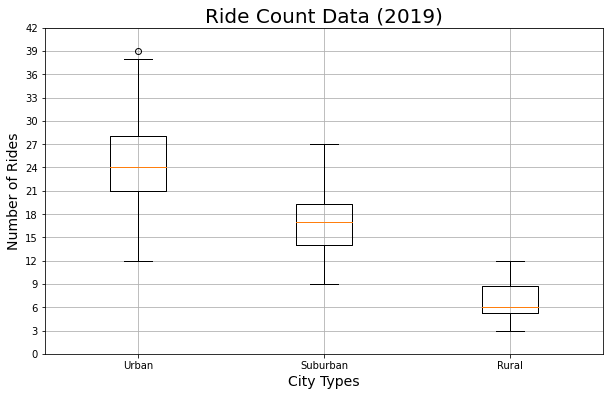

In [59]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [60]:
#City with Highest rider count which is outlier

# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


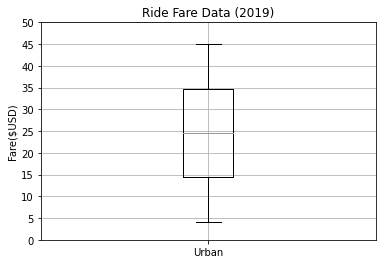

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [61]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

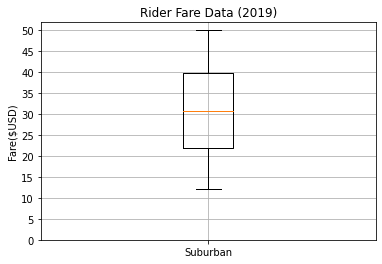

In [63]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels=["Suburban"]
fig,ax = plt.subplots()
ax.boxplot(suburban_fares,labels=x_labels)
#Add the tital, y-axis label and grid
ax.set_title("Rider Fare Data (2019)")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(0,51,step=5.0))
ax.grid()
plt.show
print("Summary Statistics")
suburban_fares.describe()

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

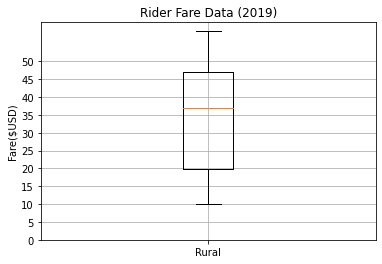

In [64]:
# Create a box-and-whisker plot for the rural fare data.
x_labels=["Rural"]
fig,ax = plt.subplots()
ax.boxplot(rural_fares,labels=x_labels)
#Add the tital, y-axis label and grid
ax.set_title("Rider Fare Data (2019)")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(0,51,step=5.0))
ax.grid()
plt.show
print("Summary Statistics")
rural_fares.describe()

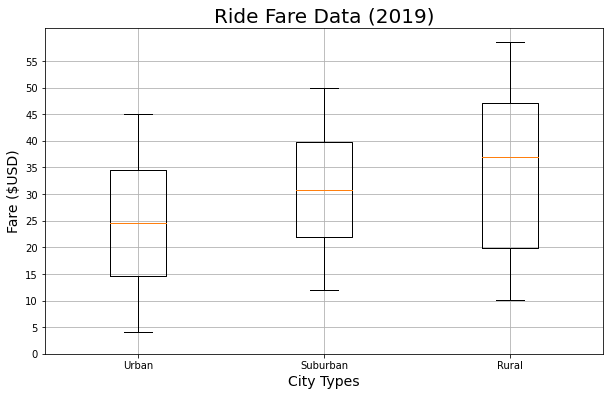

In [75]:
x_labels=["Urban","Suburban","Rural"]
ride_fare_data = [urban_fares,suburban_fares,rural_fares]
fix,ax = plt.subplots(figsize=(10,6))
ax.set_title("Ride Fare Data (2019)", fontsize = 20)
ax.set_xlabel("City Types", fontsize =14)
ax.set_ylabel("Fare ($USD)", fontsize = 14)
ax.boxplot(ride_fare_data,labels=x_labels)
ax.set_yticks(np.arange(0,60,step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()


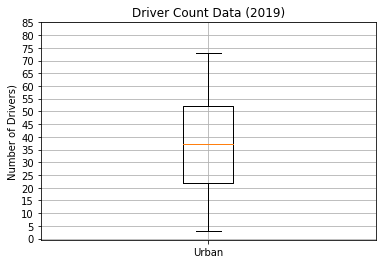

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [67]:
#We need to do one last set of box-and-whisker plots. Let's create a box-and-whisker plot for the driver count data with summary statistics.
#For the driver count data, we'll use the urban_drivers Series 

# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

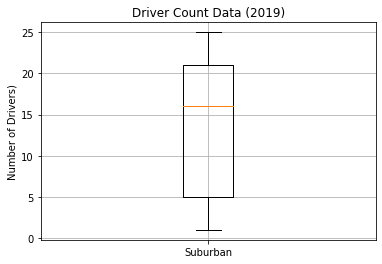

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [71]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 30, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

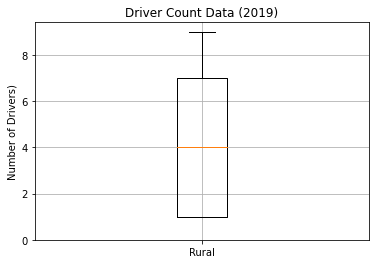

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [73]:
# Create the box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 10, step =2.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

<function matplotlib.pyplot.show(close=None, block=None)>

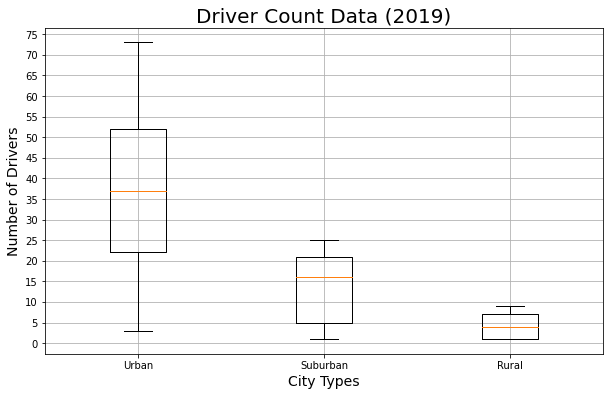

In [76]:
#Create a box and whisker plot to show all city types number of drivers 
x_labels = ["Urban","Suburban","Rural"]
driver_count_data = [urban_drivers,suburban_drivers,rural_drivers]
fig,ax = plt.subplots(figsize=(10,6))
ax.set_title ("Driver Count Data (2019)", fontsize = 20)
ax.set_xlabel ("City Types", fontsize = 14)
ax.set_ylabel ("Number of Drivers", fontsize = 14)
ax.boxplot(driver_count_data, labels = x_labels)
ax.set_yticks(np.arange(0,80,step=5))
ax.grid()
#Save the figure
plt.savefig("Analysis/Fig4.png")
plt.show